In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import copy
import matplotlib.pyplot as plt

In [3]:
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/HCC_Lu/HCC_Lu_GSE149614_raw.h5ad')
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\HCC_Lu\HCC_Lu_GSE149614_raw.h5ad")
adata = sc.read_h5ad(dataset_dir / 'HCC_Lu/HCC_Lu_GSE149614_raw.h5ad')
adata.shape

(71915, 25712)

In [3]:
adata.obs.head()

,celltype,res_3_clus,sample,site,patient,stage,virus
HCC01T_AAACCTGAGGGCATGT,T/NK,13,HCC01T,Tumor,HCC01,I,HBV
HCC01T_AAACCTGAGTCGCCGT,Myeloid,16,HCC01T,Tumor,HCC01,I,HBV
HCC01T_AAACCTGCATTACCTT,T/NK,25,HCC01T,Tumor,HCC01,I,HBV
HCC01T_AAACCTGGTCACACGC,T/NK,2,HCC01T,Tumor,HCC01,I,HBV
HCC01T_AAACCTGTCCAGTATG,T/NK,2,HCC01T,Tumor,HCC01,I,HBV


In [4]:
type(adata.X)

scipy.sparse._csc.csc_matrix

In [5]:
# Briefly view adata.X (raw counts)
rows, cols = adata.X[:5,:].nonzero()
i = 0
for row, col in zip(rows, cols):
    if i == 20: break
    print(f'Row {row}, Column {col}, Value {adata.X[row, col]}')
    i += 1


Row 0, Column 2, Value 1.0
Row 0, Column 10, Value 1.0
Row 0, Column 18, Value 1.0
Row 0, Column 20, Value 2.0
Row 0, Column 21, Value 1.0
Row 0, Column 22, Value 2.0
Row 0, Column 43, Value 3.0
Row 0, Column 68, Value 1.0
Row 0, Column 92, Value 1.0
Row 0, Column 99, Value 8.0
Row 0, Column 109, Value 1.0
Row 0, Column 125, Value 1.0
Row 0, Column 150, Value 1.0
Row 0, Column 168, Value 1.0
Row 0, Column 181, Value 1.0
Row 0, Column 183, Value 2.0
Row 0, Column 185, Value 1.0
Row 0, Column 196, Value 1.0
Row 0, Column 220, Value 1.0
Row 0, Column 222, Value 2.0


## Normalization

In [6]:
# Normalization
# each observation (cell) has a total count equal to the median of total counts for observations (cells)
sc.pp.normalize_total(adata, target_sum=None)  # see PreLect performance to see if target_sum is needed
# log1p transformation
sc.pp.log1p(adata)

In [7]:
# Briefly view adata.X (raw counts)
rows, cols = adata.X[:5,:].nonzero()
i = 0
for row, col in zip(rows, cols):
    if i == 20: break
    print(f'Row {row}, Column {col}, Value {adata.X[row, col]}')
    i += 1


Row 0, Column 2, Value 0.5672283172607422
Row 0, Column 10, Value 0.5672283172607422
Row 0, Column 18, Value 0.5672283172607422
Row 0, Column 20, Value 0.926932156085968
Row 0, Column 21, Value 0.5672283172607422
Row 0, Column 22, Value 0.926932156085968
Row 0, Column 43, Value 1.1909234523773193
Row 0, Column 68, Value 0.5672283172607422
Row 0, Column 92, Value 0.5672283172607422
Row 0, Column 99, Value 1.9610776901245117
Row 0, Column 109, Value 0.5672283172607422
Row 0, Column 125, Value 0.5672283172607422
Row 0, Column 150, Value 0.5672283172607422
Row 0, Column 168, Value 0.5672283172607422
Row 0, Column 181, Value 0.5672283172607422
Row 0, Column 183, Value 0.926932156085968
Row 0, Column 185, Value 0.5672283172607422
Row 0, Column 196, Value 0.5672283172607422
Row 0, Column 220, Value 0.5672283172607422
Row 0, Column 222, Value 0.926932156085968


## UMAP before batch effect correction

In [8]:
sc.tl.pca(adata, svd_solver="arpack")

In [9]:
# neighborhood graph
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
sc.tl.umap(adata)

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


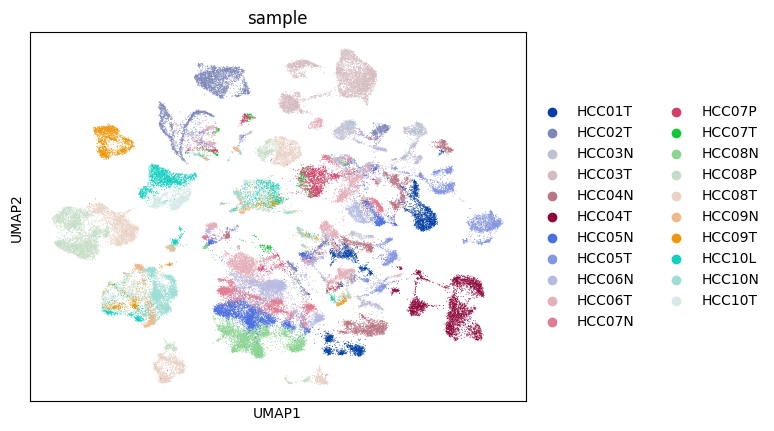

In [11]:
sc.pl.umap(adata, color='sample')

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

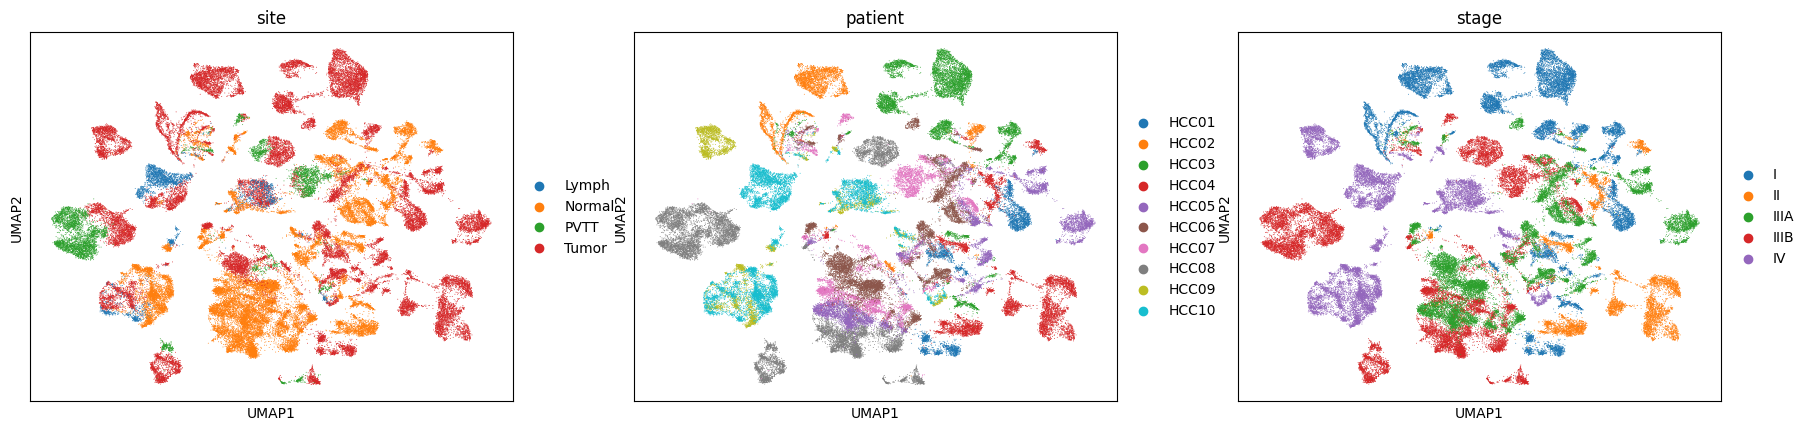

In [12]:
sc.pl.umap(adata, color=['site', 'patient', 'stage'])

## Batch effect correction with Harmony

In [13]:
import scanpy.external as sce

# sce.pp.harmony_integrate(adata, key='Batch')
sce.pp.harmony_integrate(adata, key=['sample'])

2024-11-22 18:46:59,687 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
2024-11-22 18:47:24,907 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-11-22 18:47:25,250 - harmonypy - INFO - Iteration 1 of 10
2024-11-22 18:47:49,386 - harmonypy - INFO - Iteration 2 of 10
2024-11-22 18:48:13,524 - harmonypy - INFO - Iteration 3 of 10
2024-1

In [14]:
# Harmony adds a new table in adata.obsm containing the adjusted PC’s.
'X_pca_harmony' in adata.obsm

True

In [15]:
# Use the batch-corrected PCs for calculating the neighbors
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, use_rep='X_pca_harmony')

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


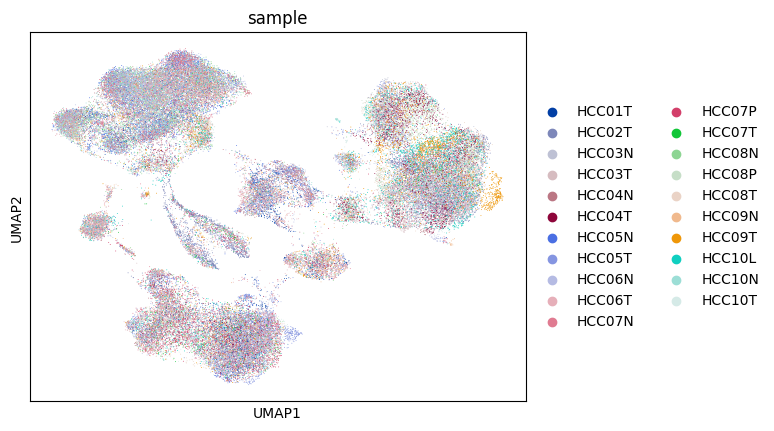

In [16]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='sample')

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

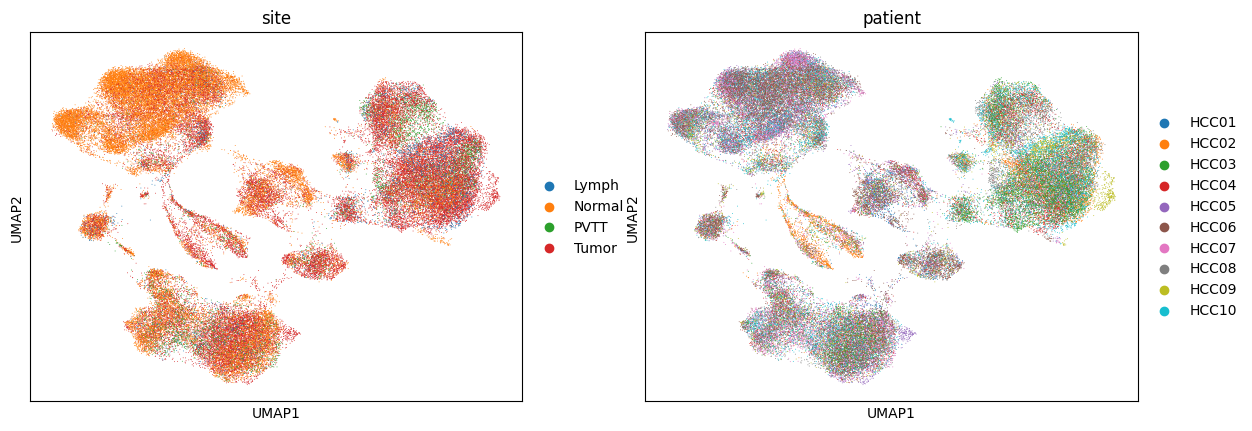

In [17]:
sc.pl.umap(adata, color=['site', 'patient'])

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


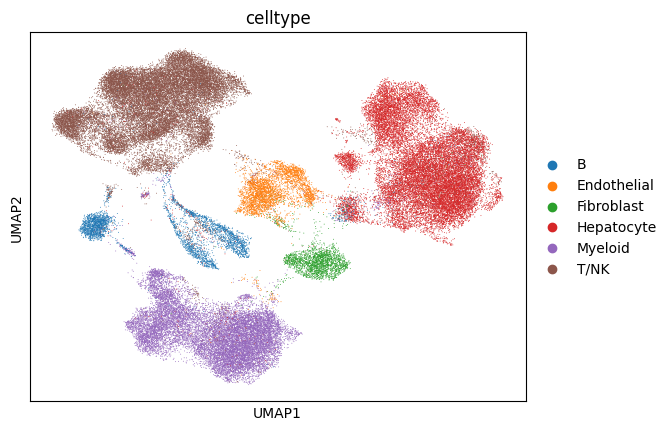

In [18]:
sc.pl.umap(adata, color='celltype')

## Leiden

In [19]:
sc.tl.leiden(adata, resolution=0.9)

/var/folders/t1/zclr_f3s57j185f2tblqgwt00000gn/T/ipykernel_17655/2912841337.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.9)


In [20]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)
sc.tl.umap(adata, init_pos='paga')


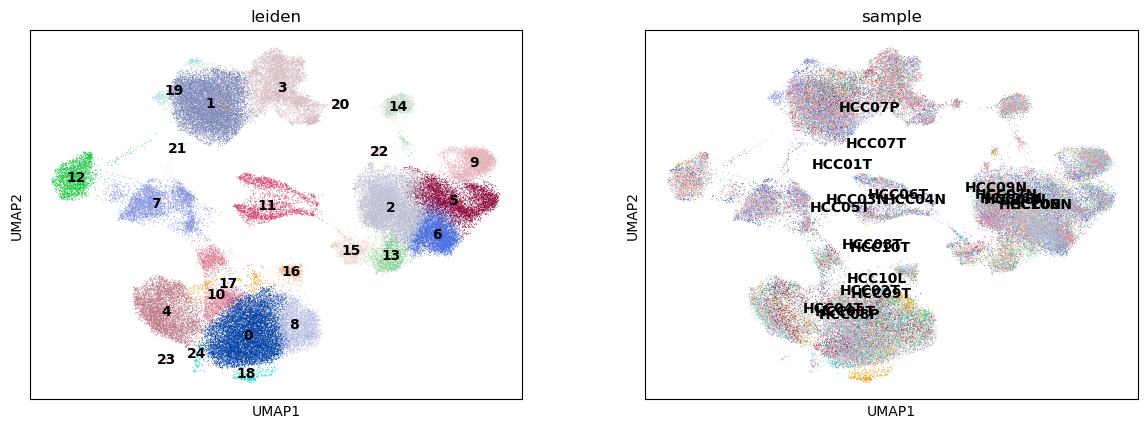

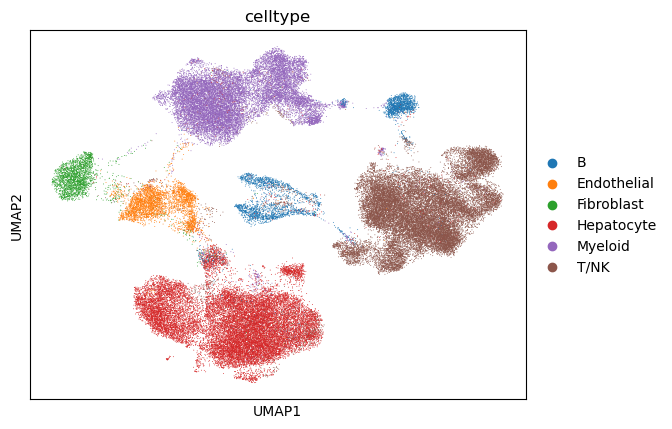

In [21]:
sc.pl.umap(adata, color=['leiden', 'sample'], legend_loc="on data")
sc.pl.umap(adata, color=['celltype'], legend_loc="right margin")

In [22]:
adata.obs['leiden'].unique().shape

(25,)

## Leiden v2 (Final version)

In [27]:
sc.tl.leiden(adata, resolution=0.9)

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

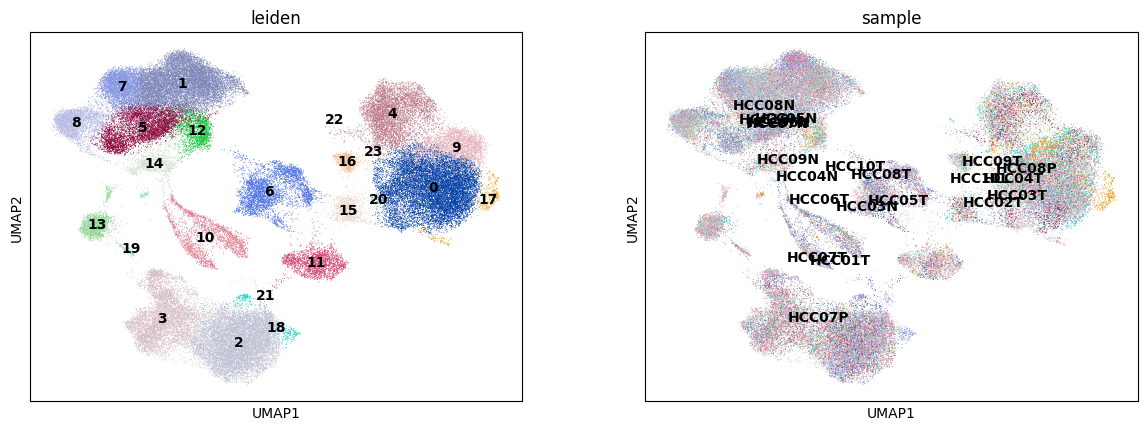

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


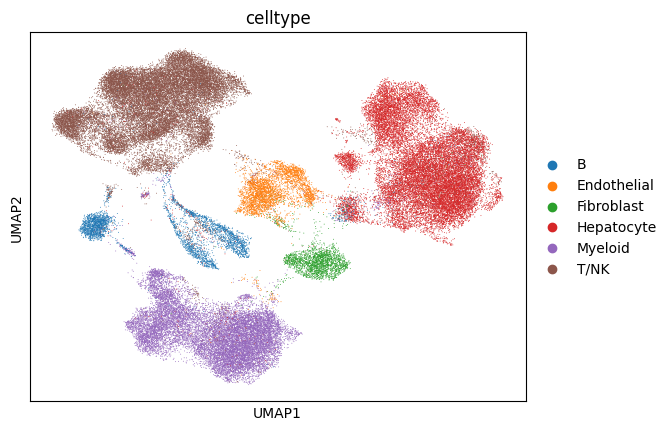

In [28]:
sc.pl.umap(adata, color=['leiden', 'sample'], legend_loc="on data")
sc.pl.umap(adata, color=['celltype'], legend_loc="right margin")

In [29]:
adata.obs['leiden'].unique().shape

(24,)

In [30]:
adata.obs['leiden'].value_counts()

leiden
0     11758
1     10188
2      9742
3      5660
4      5021
5      4740
6      3858
7      3815
8      2920
9      2881
10     2220
11     2103
12     1641
13     1495
14     1065
15      946
16      599
17      367
18      321
19      260
20      182
21      107
22       19
23        7
Name: count, dtype: int64

In [33]:
adata.obs.head()

,celltype,res_3_clus,sample,site,patient,stage,virus,leiden
HCC01T_AAACCTGAGGGCATGT,T/NK,13,HCC01T,Tumor,HCC01,I,HBV,5
HCC01T_AAACCTGAGTCGCCGT,Myeloid,16,HCC01T,Tumor,HCC01,I,HBV,3
HCC01T_AAACCTGCATTACCTT,T/NK,25,HCC01T,Tumor,HCC01,I,HBV,5
HCC01T_AAACCTGGTCACACGC,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,1
HCC01T_AAACCTGTCCAGTATG,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,1


In [35]:
leiden = [f'Leiden_{i}' for i in adata.obs['leiden']]
adata.obs['leiden'] = leiden
adata.obs.head()

,celltype,res_3_clus,sample,site,patient,stage,virus,leiden
HCC01T_AAACCTGAGGGCATGT,T/NK,13,HCC01T,Tumor,HCC01,I,HBV,Leiden_5
HCC01T_AAACCTGAGTCGCCGT,Myeloid,16,HCC01T,Tumor,HCC01,I,HBV,Leiden_3
HCC01T_AAACCTGCATTACCTT,T/NK,25,HCC01T,Tumor,HCC01,I,HBV,Leiden_5
HCC01T_AAACCTGGTCACACGC,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,Leiden_1
HCC01T_AAACCTGTCCAGTATG,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,Leiden_1


In [ ]:
# Write preprocessed adata to .h5ad
# os.chdir(r'C:\Users\evanlee\Documents\Research_datasets\HCC_Lu')
os.chdir(dataset_dir / 'HCC_Lu')
adata.write(filename='HCC_Lu_preprocessed_noscale.h5ad')

In [37]:
# Find all-zero columns
all_zero_columns = np.diff(adata.X.indptr) == 0
sum(all_zero_columns)


6